# Predicting the resale value of a car.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
import os

In [2]:
data = pd.read_csv('C:/Users/Dell-pc/Desktop/Summer2019/project_ml/autos.csv', sep=',', header=0,encoding='cp1252')

In [3]:
data.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [4]:
data.get_dtype_counts()

int64      7
object    13
dtype: int64

In [5]:
data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [6]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [7]:
copy = data.copy()
copy = copy[
    (copy["yearOfRegistration"].between(1950, 2019, inclusive=True)) &
    (copy["powerPS"].between(100, 500, inclusive=True)) &
    (copy["price"].between(100, 200000, inclusive=True))
]

## Data Visualization
Graphs for few attributes to roughly understand the dependence of price with each feature.

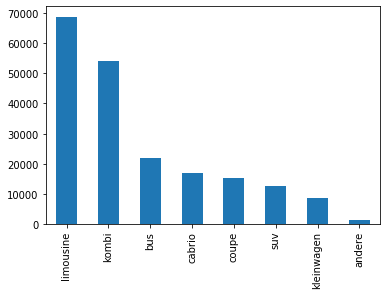

In [8]:
%matplotlib inline
copy['vehicleType'].value_counts().plot(kind='bar')

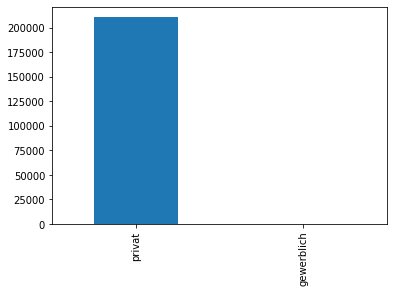

In [9]:
%matplotlib inline
copy['seller'].value_counts().plot(kind='bar')

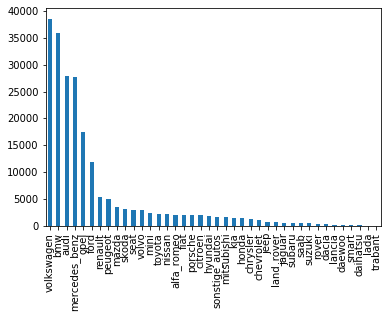

In [10]:
%matplotlib inline
copy['brand'].value_counts().plot(kind='bar')

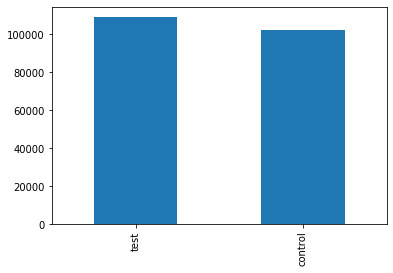

In [11]:
%matplotlib inline
copy['abtest'].value_counts().plot(kind='bar')

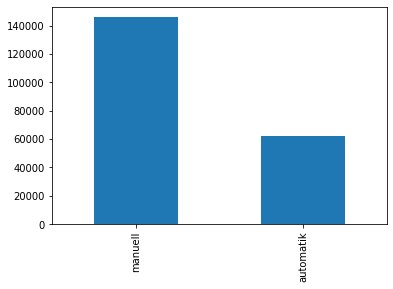

In [12]:
%matplotlib inline
copy['gearbox'].value_counts().plot(kind='bar')

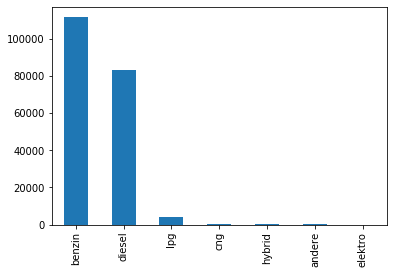

In [13]:
%matplotlib inline
copy['fuelType'].value_counts().plot(kind='bar')

In [14]:
print("Size of current Data set : ", copy.shape[0], "\n","Size of original Dataset :",data.shape[0],"\n","Percentage %: ", copy.shape[0]/data.shape[0])

Size of current Data set :  210867 
 Size of original Dataset : 371528 
 Percentage %:  0.5675669128571736


1. In the below step, firstly I have created a copy of the dataset. 
2. Roughly understood the features, and removed few samples from dataset.
3. Filled all the NaN values with Unknown.
4. Converted columns datatype columns to categorical attributes.
5. Converted category type coolumns to numerical attributes.
6. Dropped all unnecessary columns in the  clean copy.

In [15]:
# 1. In the below step, firstly I have created a copy of the dataset. 
clean = data.copy()

# 2. Roughly understood the features, and removed few samples from dataset.

clean = clean[
    (clean["yearOfRegistration"].between(1950, 2019, inclusive=True)) &
    (clean["powerPS"].between(100, 500, inclusive=True)) &
    (clean["price"].between(100, 200000, inclusive=True)) &
    (clean["offerType"] == "Angebot") 
]
# 3. Filled all the NaN values with Unknown.

clean['vehicleType'].fillna(value='Unknown', inplace=True)
clean['gearbox'].fillna(value='Unknown', inplace=True)
clean['model'].fillna(value='Unknown', inplace=True)
clean['fuelType'].fillna(value='Unknown', inplace=True)
clean['notRepairedDamage'].fillna(value='Unknown', inplace=True) 




In [16]:
# 4. Converted columns datatype columns to categorical attributes.

for column in clean:
    if clean[column].dtype == "object":
        clean[column] = clean[column].astype('category')
        

In [17]:
# 5. Converted category type coolumns to numerical attributes.

cat_columns = clean.select_dtypes(['category']).columns
clean[cat_columns] = clean[cat_columns].apply(lambda x: x.cat.codes)
        

In [18]:
# 6. Dropped all unnecessary columns in the  clean copy.

drop = ["dateCrawled", "abtest", "dateCreated", "nrOfPictures", "lastSeen"]
clean = clean.drop(drop, axis=1)

In [19]:
# here the data is now of data type numerical
clean.head()

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,2178,1,0,18300,4,2011,2,190,25,125000,5,4,1,1,66954
2,56949,1,0,9800,8,2004,1,163,115,125000,8,4,14,0,90480
5,20872,1,0,650,7,1995,2,102,11,150000,10,2,2,1,33775
6,88845,1,0,2200,3,2004,2,109,8,150000,8,2,25,2,67112
8,44832,1,0,14500,2,2014,2,125,59,30000,8,2,10,0,94505


In [20]:
# Split the data into testing and training sets using train_test_split
training, testing = train_test_split(clean, test_size = 0.3, random_state = 51)
auto_price = training["price"].copy()
data = training.drop("price", axis=1)

In [21]:
# Scikit-learn is not equipped to work with DataFrames, thus created a class to select numerical and categroical columns.
class DataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

###  Building Pipelines

In [22]:
categorical_att = ["name", "seller", "offerType", "vehicleType", "fuelType", "brand", "notRepairedDamage"]
numerical_att = list(data.drop(categorical_att, axis=1))

num_pipe = Pipeline([
    ("selector", DataFrame(numerical_att)),
    ("std_scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("selector", DataFrame(categorical_att)),
    ("encoder", OneHotEncoder(sparse=True))
])

full_pipe = FeatureUnion(transformer_list =[
    ("num_pipe", num_pipe),
    ("cat_pipe", cat_pipe)
])

In [23]:
auto_prep = full_pipe.fit_transform(data)

C:\Users\Dell-pc\Anaconda3\envs\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [24]:
cars_test = testing.drop("price", axis = 1)
auto_test_price = testing["price"].copy()
auto_test = full_pipe.transform(cars_test) 

## Using Linear Regression

In [25]:
lin = LinearRegression()
lin.fit(auto_prep, auto_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
#Calculating rmse value
lin_pred = lin.predict(auto_test)
lin_mse = mean_squared_error(auto_test_price, lin_pred)
lin_rmse = np.sqrt(lin_mse)

In [28]:
lin_rmse

5756.646231487731

In [29]:
# Score based on the training dataset
lin.score(auto_prep, auto_price)

0.9600377331138339

In [30]:
# Score based on the testing dataset, this is the final score
lin.score(auto_test, auto_test_price)

0.5983082724865213

## Using Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=51, n_jobs =-1, max_depth = 30 )
forest.fit(auto_prep, auto_price)

C:\Users\Dell-pc\Anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=51, verbose=0,
                      warm_start=False)

In [32]:
#Calculating rmse value
forest_pred = forest.predict(auto_test)
forest_mse = mean_squared_error(auto_test_price, forest_pred)
forest_rmse = np.sqrt(forest_mse)

In [33]:
forest_rmse

3544.7329745695297

In [34]:
# Score based on the training dataset
forest.score(auto_prep, auto_price)

0.9706080644046199

In [35]:
# Score based on the testing dataset, this is the final score
forest.score(auto_test, auto_test_price)

0.8476926520334684

## Using KNN 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [37]:
knn.fit(auto_prep, auto_price)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
#Calculating rmse value
knn_pred = knn.predict(auto_test)
knn_mse = mean_squared_error(auto_test_price, knn_pred)
knn_rmse = np.sqrt(knn_mse)

In [39]:
knn_rmse

5848.228774311379

In [40]:
# Score based on the training dataset
knn.score(auto_prep, auto_price)

0.26193379672913025

In [41]:
# Score based on the testing dataset, this is the final score
knn.score(auto_test, auto_test_price)

0.044561420148274605